In [1]:
#imports
import numba
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot



### load train and test dataset + preprocess

In [2]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

trainX, trainY, testX, testY = load_dataset()

In [3]:
# preprocess pixels
def preprocess_pixels(trainX, testX):
    # convert from integers to floats
    trainX_norm = trainX.astype('float32')
    testX_norm = testX.astype('float32')
    # normalize to range 0-1
    trainX_norm = trainX_norm / 255.0
    testX_norm = testX_norm / 255.0
    # return normalized images
    return trainX_norm, testX_norm

trainX, testX = preprocess_pixels(trainX, testX)
print("trainX shape ", trainX.shape, "testX shape ", testX.shape)

trainX shape  (60000, 28, 28, 1) testX shape  (10000, 28, 28, 1)


In [4]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from PIL import Image

class myKmeans:
    def __init__(self, nb_clusters = 1, max_iter = 300, tol = 0.0001):
        self.nb_clusters = nb_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.clusters = []
        
    
    def fit(self, dataset):
        #init of clusters
        get_ids = []
        while len(self.clusters) < self.nb_clusters:
            r = random.randint(0, len(dataset))
            if r in get_ids:
                continue
            get_ids.append(r)
            self.clusters.append(dataset[r])
        
        has_moved = True
        associate = [] #id => id of element, value => id of closest cluster
        count = 0
        for i in range(self.max_iter):
            #print(f"###################\n# iter number {i} #\n###################")
            has_moved = False
            associate.clear()
            count += 1
            #associate elements with his closest cluster
            #print("associate elements with his closest cluster")
            for element in dataset:
                val_closest = np.linalg.norm(element - self.clusters[0])
                id_closest = 0
                for i,cluster in enumerate(self.clusters):
                    val = np.linalg.norm(element - cluster)
                    if val <= val_closest:
                        val_closest = val
                        id_closest = i
                        
                associate.append(id_closest)



            #recenter clusters
            #print("recenter clusters")
            # len(dataset.shape()) ==> nombre de coordonnées
            for id_cluster,cluster in enumerate(self.clusters):
                new_cluster = np.zeros(cluster.shape)
                count = 0
                for id_element,id_closest_cluster in enumerate(associate):
                    if id_cluster == id_closest_cluster:
                        count+=1
                        new_cluster += dataset[id_element]
                
                if count == 0:
                  # recenter random
                  self.clusters[id_cluster] = dataset[random.randint(0, len(dataset))]
                else:
                    new_cluster = new_cluster / count
                
                # did the cluster moved?
                diff = np.linalg.norm(new_cluster - cluster)
                #print(f"norm of the move of the cluster {id_cluster} : {diff}")
                if diff > self.tol: 
                    has_moved = True
                    
                self.clusters[id_cluster] = new_cluster 
            if has_moved == False:
                break
            #print()
        print(f"###################\n# iter number {count} #\n###################")
        self.plot(associate)
              
    
    def simple_encode(self, X):#return as a int the id of the cluster
        val_closest = np.linalg.norm(X - self.clusters[0])
        id_closest = 0
        for i,cluster in tqdm(enumerate(self.clusters)):
            val = np.linalg.norm(X - cluster)
            if val <= val_closest:
                val_closest = val
                id_closest = i
        return id_closest
    
    def one_hot_encode(self,X):
        liste = [0*self.nb_clusters]
        liste[self.simple_encode(X)] = 1
        return liste
    
    def simple_decode(self, X_encode):
        return self.clusters[X_encode]
    
    def one_hot_decode(self, X_encode):
        return self.clusters(X_encore.index(1))

    def plot(self, associate):
        colors = []

        for i in range(self.nb_clusters):
            r = lambda: random.randint(0,255)
            colors.append('#%02X%02X%02X' % (r(),r(),r()))
        histo_table = []

        for i in range(self.nb_clusters):
            histo_table.append(associate.count(i))
        print()
        print(histo_table)
        print(colors)
        print()

        plt.bar(list(range(self.nb_clusters)), histo_table, color = colors)
        plt.show()


    def print_clusters_as_images(self):
        fig=plt.figure(figsize=(10, 10))
        columns = 10
        rows = int(self.nb_clusters / 10) + 1 # image orginal

        for id,i in enumerate(self.clusters):
            fig.add_subplot(rows, columns, id+1)       
            plt.imshow(testX[r].squeeze(2), cmap=plt.cm.binary)
            plt.imshow(i.squeeze(2), cmap=plt.cm.binary)
            plt.xlabel(id)


In [7]:
test1 = myKmeans(nb_clusters=2,tol=0.00001)
#test2 = myKmeans(nb_clusters=4,tol=0.00001)
test3 = myKmeans(nb_clusters=6,tol=0.00001)
# test4 = myKmeans(nb_clusters=8,tol=0.00001)
test5 = myKmeans(nb_clusters=10,max_iter=500,tol=0.00001)
# test6 = myKmeans(nb_clusters=12,max_iter=500,tol=0.00001)
# test7 = myKmeans(nb_clusters=15,max_iter=500,tol=0.00001)
# test8 = myKmeans(nb_clusters=18,max_iter=500,tol=0.00001)
test9 = myKmeans(nb_clusters=20,max_iter=500,tol=0.00001)

###################
# iter number 37130 #
###################

[22870, 37130]
['#DDB2B4', '#E465BB']



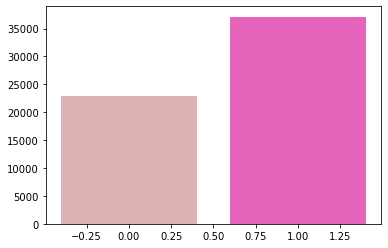

###################
# iter number 12676 #
###################

[17832, 12081, 17411, 12676]
['#C41B93', '#E714EF', '#F52F2A', '#B47D36']



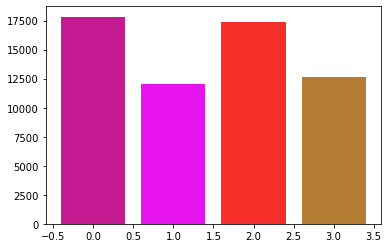

###################
# iter number 11381 #
###################

[10353, 5368, 11491, 10087, 11320, 11381]
['#7A8C88', '#557C6A', '#79B320', '#076F1E', '#9C5425', '#1BBFC3']



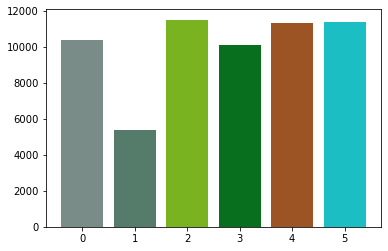

NameError: name 'test4' is not defined

In [8]:
test1.fit(trainX)
test2.fit(trainX)
test3.fit(trainX)
test4.fit(trainX)
test5.fit(trainX)
test6.fit(trainX)
test7.fit(trainX)
test8.fit(trainX)
test9.fit(trainX)

2it [00:00, ?it/s]
6it [00:00, ?it/s]


IndexError: list index out of range

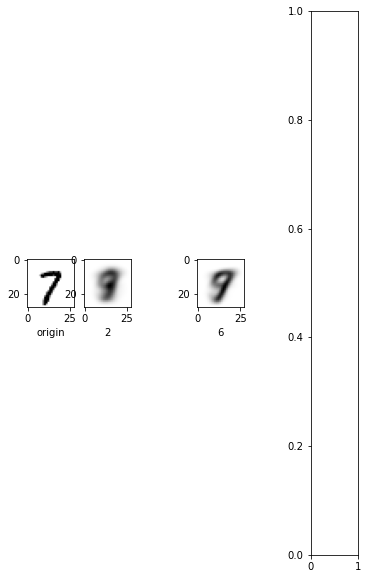

In [9]:
for i in range(10):
    fig=plt.figure(figsize=(10, 10))
    columns = 10
    rows = 1

    r = random.randint(0, len(testX))

    fig.add_subplot(rows, columns, 1) 
    plt.imshow(testX[r].squeeze(2), cmap=plt.cm.binary) # image orginal
    plt.xlabel("origin")

    fig.add_subplot(rows, columns, 2)
    plt.imshow(test1.simple_decode(test1.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test1.nb_clusters)

#     fig.add_subplot(rows, columns, 3)
#     plt.imshow(test2.simple_decode(test2.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
#     plt.xlabel(test2.nb_clusters)

    fig.add_subplot(rows, columns, 4)
    plt.imshow(test3.simple_decode(test3.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test3.nb_clusters)

#     fig.add_subplot(rows, columns, 5)
#     plt.imshow(test4.simple_decode(test4.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
#     plt.xlabel(test4.nb_clusters)

    fig.add_subplot(rows, columns, 6)
    plt.imshow(test5.simple_decode(test5.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test5.nb_clusters)

#     fig.add_subplot(rows, columns, 7)
#     plt.imshow(test6.simple_decode(test6.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
#     plt.xlabel(test6.nb_clusters)

#     fig.add_subplot(rows, columns, 8)
#     plt.imshow(test7.simple_decode(test7.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
#     plt.xlabel(test7.nb_clusters)

#     fig.add_subplot(rows, columns, 9)
#     plt.imshow(test8.simple_decode(test8.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
#     plt.xlabel(test8.nb_clusters)

    fig.add_subplot(rows, columns, 10)
    plt.imshow(test9.simple_decode(test9.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
    plt.xlabel(test9.nb_clusters)

plt.show()